**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../Datasets/dataset_andpre/EdgeIIot_train_smoteNC.csv")
display(df_train)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.014679,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.014679,-0.044214,-0.756566,-0.184151,-0.046843,-0.778440,-0.777869,-0.778499,-1.303156,-0.563255,-0.589983,-0.184780,-0.040003,-0.499835,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,0.712756,0.273386,-0.002815,0.505192,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,0.700756,0.258094,-0.014705,0.494734,-0.371757,-0.016764,-0.166467,-1.229442,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210402,-0.211092,-0.207410,-0.057970,0.567019,0.279126,0.022051,0.428915,-0.303942,-0.801662,-0.708314,-0.725170,-0.653861,udp_flood,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,-0.405701,-0.179829,-0.005091,0,-0.044214,-0.223505,-0.756566,-0.651330,-0.405701,-0.044214,-0.756566,-0.184151,-0.046843,-0.778416,-0.777869,-0.778487,-1.303156,-0.563255,-0.589983,-0.184780,-0.04

In [4]:
df_test = pd.read_csv("../Datasets/dataset_andpre/EdgeIIot_test.csv")
display(df_test)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,type,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,fwd_header_size_min_0,fwd_header_size_min_8,fwd_header_size_min_20,fwd_header_size_min_24,fwd_header_size_min_32,fwd_header_size_min_40,fwd_header_size_min_44,fwd_header_size_max_0,fwd_header_size_max_8,fwd_header_size_max_20,fwd_header_size_max_24,fwd_header_size_max_32,fwd_header_size_max_40,fwd_header_size_max_44,bwd_header_size_min_0,bwd_header_size_min_8,bwd_header_size_min_20,bwd_header_size_min_24,bwd_header_size_min_32,bwd_header_size_min_40,bwd_header_size_min_44,bwd_header_size_max_0,bwd_header_size_max_8,bwd_header_size_max_20,bwd_header_size_max_24,bwd_header_size_max_32,bwd_header_size_max_40,bwd_header_size_max_44,bwd_header_size_max_52,flow_FIN_flag_count_0,flow_FIN_flag_count_1,flow_FIN_flag_count_2,flow_FIN_flag_count_3,flow_FIN_flag_count_4,flow_FIN_flag_count_5,flow_FIN_flag_count_6,flow_FIN_flag_count_7,flow_SYN_flag_count_0,flow_SYN_flag_count_1,flow_SYN_flag_count_2,flow_SYN_flag_count_3,flow_SYN_flag_count_4,flow_SYN_flag_count_5,flow_SYN_flag_count_6,flow_SYN_flag_count_7,flow_SYN_flag_count_8,flow_SYN_flag_count_9,flow_SYN_flag_count_10,flow_RST_flag_count_0,flow_RST_flag_count_1,flow_RST_flag_count_2,flow_RST_flag_count_3,flow_RST_flag_count_4,history_originator_0,history_originator_1,history_originator_2,history_originator_3,history_originator_4,history_originator_5,history_originator_6,history_responder_0,history_responder_1,history_responder_2,history_responder_3,history_responder_4,history_responder_5
0,-0.540587,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540587,-0.302948,0.113379,-0.184151,-0.046843,1.467120,1.469549,1.468985,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0.053936,-0.071549,-0.224057,-0.170028,-0.202208,-0.218073,-0.026854,-0.0416,-0.042557,-0.034801,-0.029821,-0.033188,-0.224624,-0.170656,-0.208086,-0.221173,-0.412900,-0.545421,-0.528133,-0.513173,-0.366493,-0.094334,-0.191905,-0.136594,-0.176039,-0.170188,-0.430596,-0.566738,-0.540613,-0.530154,-0.371757,-0.016764,-0.166467,0.638795,-0.211130,-0.033546,-0.004556,-0.003094,-0.004674,-0.003342,-0.002221,-0.001499,-0.210396,-0.211087,-0.207405,-0.05797,-0.477199,-0.536505,-0.510501,-0.528202,-0.303942,1.264714,-0.708314,1.400702,-0.653861,http_flood,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,-0.540588,-0.179829,-0.005091,0,-0.302948,-0.211850,0.113379,0.010046,-0.540588,-0.302948,0.113379,-0.184151,-0.046843,1.552666,1.555165,1.554603,0.708010,-0.039559,-0.047807,-0.184780,-0.040003,-0

---------------------------------------

**Create Model & Train Model**

In [5]:
df_train.groupby('type')['type'].count()

type
arp_spoofing           89090
http_botnet            89090
http_flood             89090
http_flood_node_red    89090
icmp_flood             89090
mqtt_flood             89090
normal                 89090
port_scanning          89090
tcp_flood              89090
udp_flood              89090
Name: type, dtype: int64

In [6]:
x_columns = df_train.columns.drop('type')

le = LabelEncoder()
le.fit(df_train["type"].values)

x = df_train[x_columns].values
y = df_train["type"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('type')

le = LabelEncoder()
le.fit(df_test["type"].values)

x_val = df_test[x_columns].values
y_val = df_test["type"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((222725, 158), (222725,))

In [10]:
x_train.shape,y_train.shape

((668175, 158), (668175,))

In [11]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('best_model_multiclass_smoteNC.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=512, callbacks=[monitor, checkpoint])

Train on 668175 samples, validate on 222725 samples
Epoch 1/300
668175/668175 [==============================] - 5s 8us/sample - loss: 1.3674 - accuracy: 0.5331 - val_loss: 0.4722 - val_accuracy: 0.7973
Epoch 2/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.7107 - accuracy: 0.7208 - val_loss: 0.4180 - val_accuracy: 0.8080
Epoch 3/300
668175/668175 [==============================] - 4s 7us/sample - loss: 0.5873 - accuracy: 0.7538 - val_loss: 0.4024 - val_accuracy: 0.8142
Epoch 4/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.5358 - accuracy: 0.7691 - val_loss: 0.3899 - val_accuracy: 0.8244
Epoch 5/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.5037 - accuracy: 0.7809 - val_loss: 0.3780 - val_accuracy: 0.8298
Epoch 6/300
668175/668175 [==============================] - 5s 7us/sample - loss: 0.4832 - accuracy: 0.7886 - val_loss: 0.3706 - val_accuracy: 0.8362
Epoch 7/300
668175/668175 [===============

668175/668175 [==============================] - 6s 9us/sample - loss: 0.3715 - accuracy: 0.8287 - val_loss: 0.3295 - val_accuracy: 0.8408
Epoch 55/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3691 - accuracy: 0.8298 - val_loss: 0.3293 - val_accuracy: 0.8416
Epoch 56/300
668175/668175 [==============================] - 6s 8us/sample - loss: 0.3681 - accuracy: 0.8295 - val_loss: 0.3284 - val_accuracy: 0.8406
Epoch 57/300
668175/668175 [==============================] - 4s 7us/sample - loss: 0.3674 - accuracy: 0.8298 - val_loss: 0.3309 - val_accuracy: 0.8384
Epoch 58/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3682 - accuracy: 0.8297 - val_loss: 0.3308 - val_accuracy: 0.8389
Epoch 59/300
668175/668175 [==============================] - 4s 7us/sample - loss: 0.3672 - accuracy: 0.8300 - val_loss: 0.3296 - val_accuracy: 0.8422
Epoch 60/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3666 - accuracy

Epoch 108/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3543 - accuracy: 0.8334 - val_loss: 0.3229 - val_accuracy: 0.8438
Epoch 109/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3539 - accuracy: 0.8338 - val_loss: 0.3220 - val_accuracy: 0.8440
Epoch 110/300
668175/668175 [==============================] - 7s 10us/sample - loss: 0.3542 - accuracy: 0.8329 - val_loss: 0.3229 - val_accuracy: 0.8438
Epoch 111/300
668175/668175 [==============================] - 7s 10us/sample - loss: 0.3540 - accuracy: 0.8333 - val_loss: 0.3239 - val_accuracy: 0.8417
Epoch 112/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3538 - accuracy: 0.8334 - val_loss: 0.3232 - val_accuracy: 0.8429
Epoch 113/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3531 - accuracy: 0.8335 - val_loss: 0.3224 - val_accuracy: 0.8443
Epoch 114/300
668175/668175 [==============================] - 7s 10us/sample - 

668175/668175 [==============================] - 4s 6us/sample - loss: 0.3497 - accuracy: 0.8351 - val_loss: 0.3208 - val_accuracy: 0.8452
Epoch 161/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3496 - accuracy: 0.8346 - val_loss: 0.3211 - val_accuracy: 0.8449
Epoch 162/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3495 - accuracy: 0.8349 - val_loss: 0.3203 - val_accuracy: 0.8467
Epoch 163/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3487 - accuracy: 0.8350 - val_loss: 0.3196 - val_accuracy: 0.8481
Epoch 164/300
668175/668175 [==============================] - 4s 7us/sample - loss: 0.3486 - accuracy: 0.8354 - val_loss: 0.4964 - val_accuracy: 0.8237
Epoch 165/300
668175/668175 [==============================] - 5s 7us/sample - loss: 0.3498 - accuracy: 0.8343 - val_loss: 0.3200 - val_accuracy: 0.8461
Epoch 166/300
668175/668175 [==============================] - 5s 7us/sample - loss: 0.3497 - ac

668175/668175 [==============================] - 7s 10us/sample - loss: 0.3470 - accuracy: 0.8356 - val_loss: 0.3184 - val_accuracy: 0.8480
Epoch 213/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3468 - accuracy: 0.8356 - val_loss: 0.3194 - val_accuracy: 0.8457
Epoch 214/300
668175/668175 [==============================] - 6s 9us/sample - loss: 0.3469 - accuracy: 0.8357 - val_loss: 0.3193 - val_accuracy: 0.8469
Epoch 215/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3468 - accuracy: 0.8352 - val_loss: 0.3189 - val_accuracy: 0.8463
Epoch 216/300
668175/668175 [==============================] - 4s 7us/sample - loss: 0.3467 - accuracy: 0.8357 - val_loss: 0.3190 - val_accuracy: 0.8458
Epoch 217/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3469 - accuracy: 0.8359 - val_loss: 0.3188 - val_accuracy: 0.8486
Epoch 218/300
668175/668175 [==============================] - 5s 7us/sample - loss: 0.3467 - a

668175/668175 [==============================] - 4s 6us/sample - loss: 0.3457 - accuracy: 0.8361 - val_loss: 0.3179 - val_accuracy: 0.8488
Epoch 262/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3457 - accuracy: 0.8365 - val_loss: 0.3176 - val_accuracy: 0.8486
Epoch 263/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3458 - accuracy: 0.8361 - val_loss: 0.3176 - val_accuracy: 0.8487
Epoch 264/300
666112/668175 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8364
Epoch 00264: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3456 - accuracy: 0.8364 - val_loss: 0.3179 - val_accuracy: 0.8487
Epoch 265/300
668175/668175 [==============================] - 4s 6us/sample - loss: 0.3454 - accuracy: 0.8362 - val_loss: 0.3181 - val_accuracy: 0.8487
Epoch 266/300
668175/668175 [==============================] - 4s 6us/sample -

In [12]:
# Load the best-saved model
best_model = load_model('best_model_multiclass_smoteNC.h5')

# Evaluate the best-saved model
y_pred = best_model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_val, y_pred_classes)
print('')
print('Test accuracy:', acc)


Test accuracy: 0.8430163729366302


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               81408     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

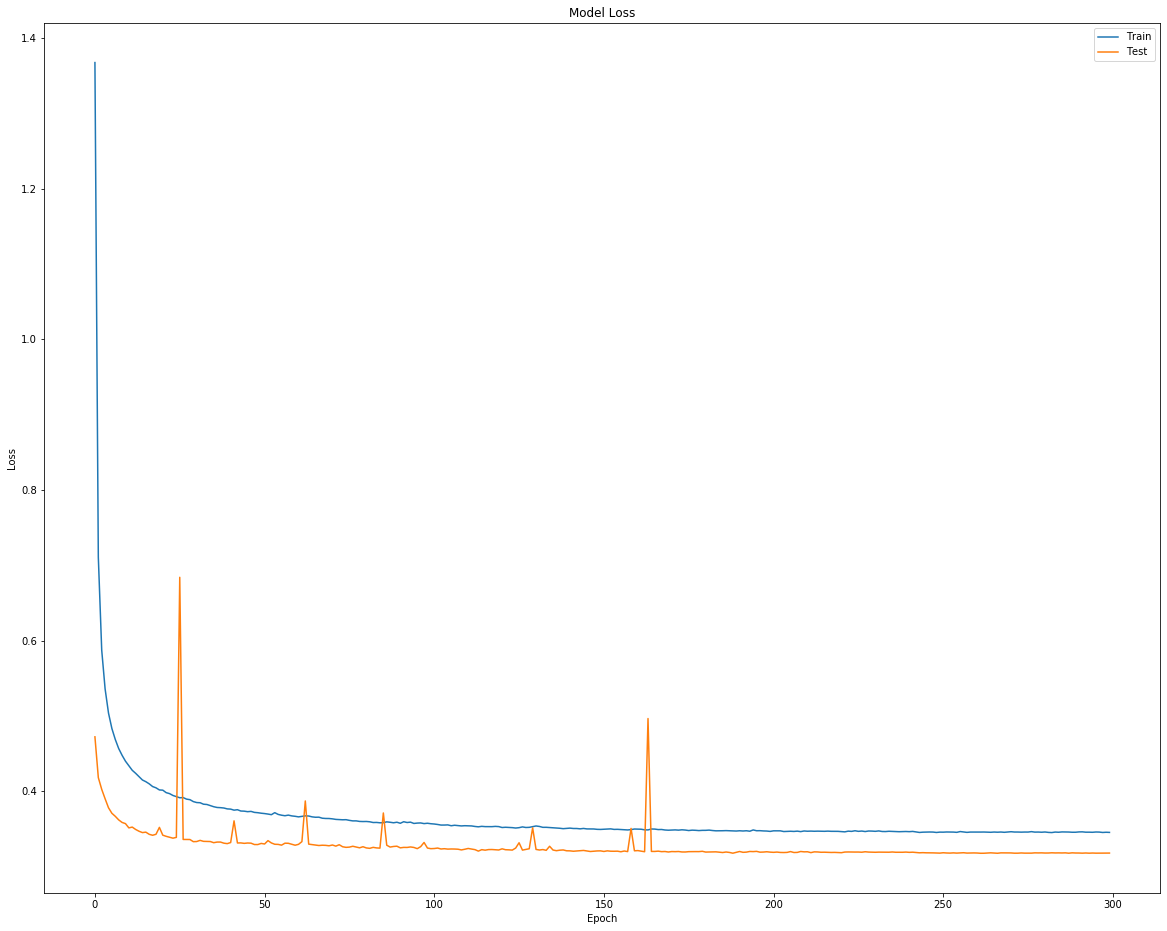

In [14]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
pred = model.predict(x_val)

In [16]:
print(y_test.shape)  # should output (111923,)
print(pred.shape)    # should output (111923, num_classes)

(222725,)
(89538, 10)


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [18]:
pred_labels = np.argmax(pred, axis=1)

calculate_metrics("Neural Network", y_val, pred_labels, average='weighted')

--- Performance of Neural Network ---
Accuracy : 84.31%
Precision: 86.01%
Recall: 84.31%
F1-score: 82.5%
Balanced accuracy: 78.95%
Classification report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       250
           1       0.11      1.00      0.20         1
           2       0.73      0.93      0.82     19782
           3       0.82      0.50      0.62     13428
           4       1.00      1.00      1.00      6029
           5       0.83      0.99      0.90     19130
           6       0.99      0.27      0.42      2310
           7       0.55      0.97      0.70      1117
           8       0.86      0.24      0.38      5282
           9       1.00      1.00      1.00     22209

    accuracy                           0.84     89538
   macro avg       0.71      0.79      0.64     89538
weighted avg       0.86      0.84      0.82     89538



-------------------------------------

**Result Plots**

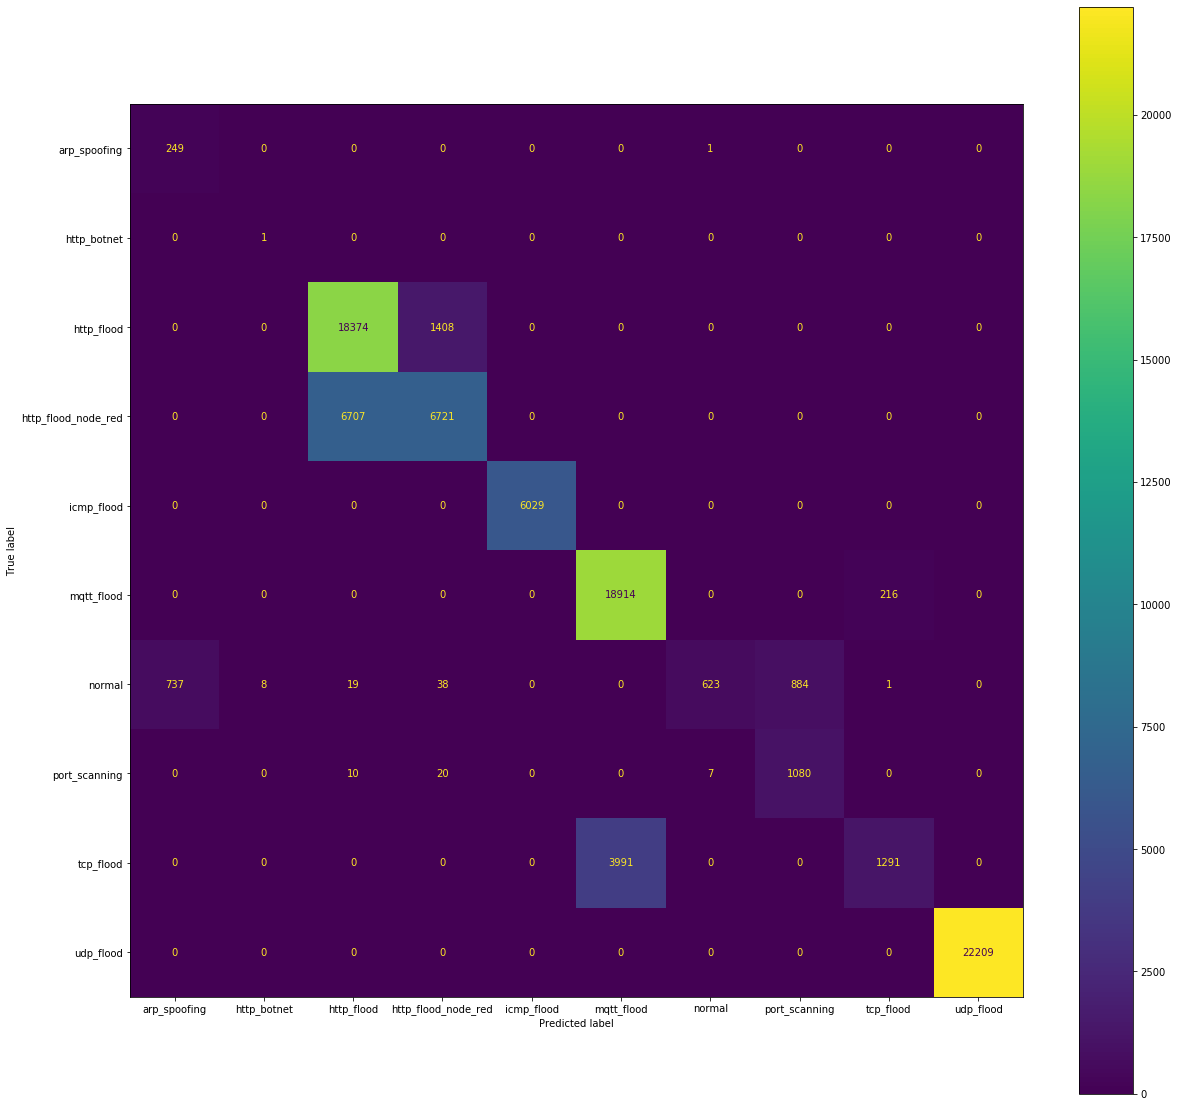

In [19]:
original_labels_list = le.classes_

# Compute confusion matrix
pred_labels = np.argmax(pred, axis=1)
cm = confusion_matrix(y_val, pred_labels)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= original_labels_list)
fig, ax = plt.subplots(figsize=(20, 20))
cmd.plot(ax=ax)

In [20]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_test, y_test)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

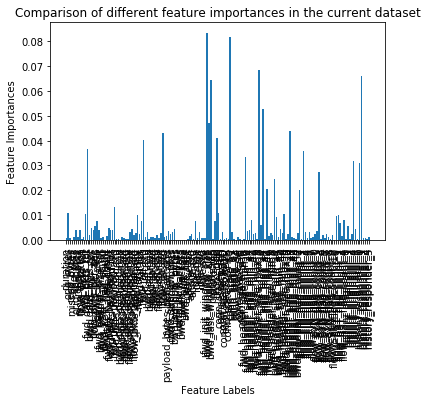

In [21]:
# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

## 